# Custom CNN model simple Implementation with MNIST dataset
#### In this session, we will use PyTorch modules to implement a simple CNN model and perform training and inference on the MNIST dataset.

## Example 1) PyTorch modules to implement a simple CNN model with MNIST dataset

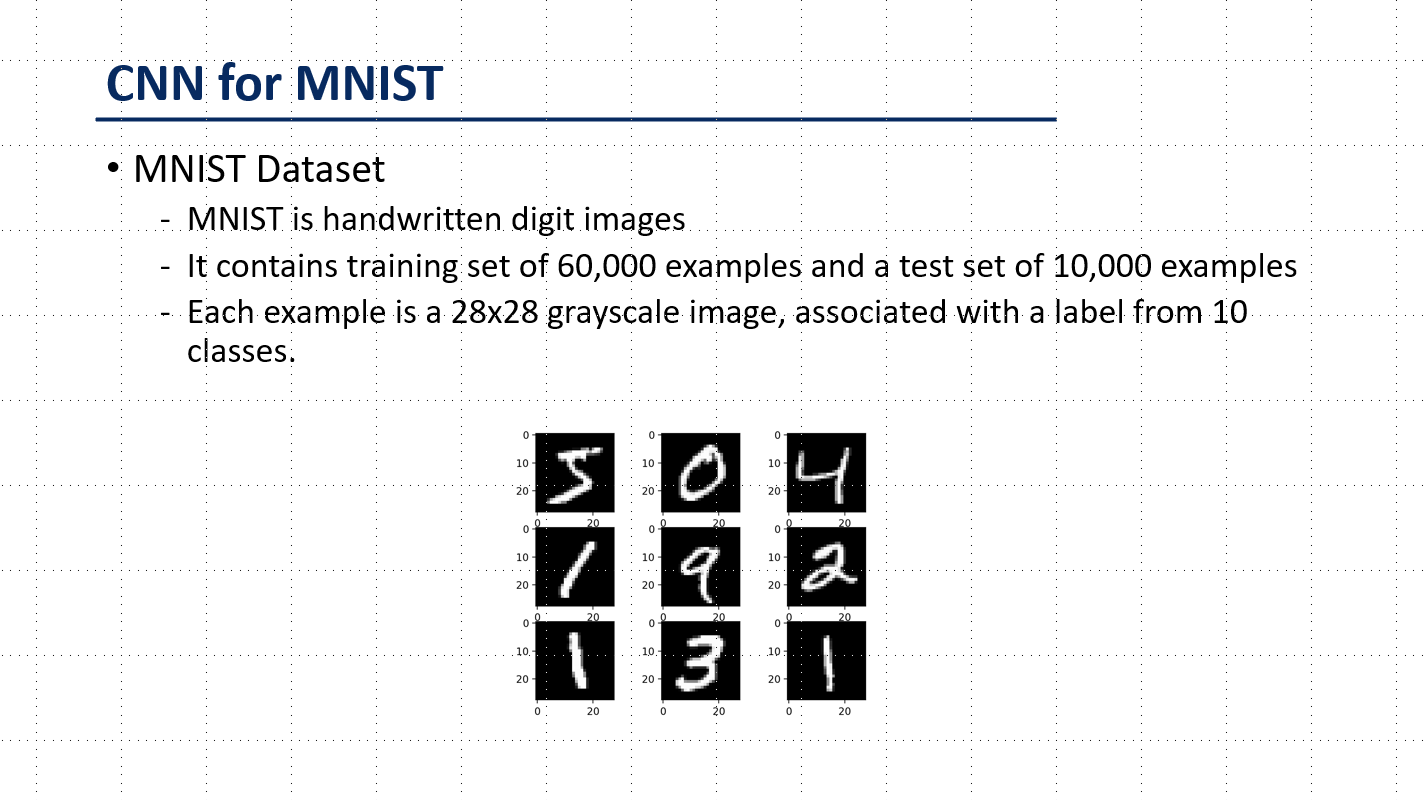

In [ ]:
# Package import
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, utils
from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# DEVICE Setting
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# Parameter Setting
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.0001

# Transform Setting
transform_MNIST = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))# mean and std
])

### Q. Why should we normalize input data?
#### 1) If the features in the data have very different scales, it can make training the model difficult.
#### 2) When input values are very large, it can increase memory usage and computation time, causing the model to converge more slowly.
![image.png](http://drive.google.com/uc?id=1zy7tVebn3LofaR-jCFL8cZfClre3Aa8g)

In [ ]:
# Dataset Setting
train_dataset = datasets.MNIST(root = '../data',
                                         train = True,
                                         download = True,
                                         transform = transform_MNIST)

test_dataset = datasets.MNIST(root = '../data',
                                train = False,
                                download = True,
                                transform = transform_MNIST)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=True)  # shuffle during training time

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=False)  # not shuffle during inference time

100%|██████████| 9912422/9912422 [00:00<00:00, 453630743.19it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 54862180.17it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 188788562.13it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20595166.24it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



![image.png](http://drive.google.com/uc?id=12reHf9xtapZrVBG4LlNbNGa37ZeFfUqk)
![image.png](http://drive.google.com/uc?id=17DgT11woHwXACEGOfvkVd8pYmxRI7vQl)
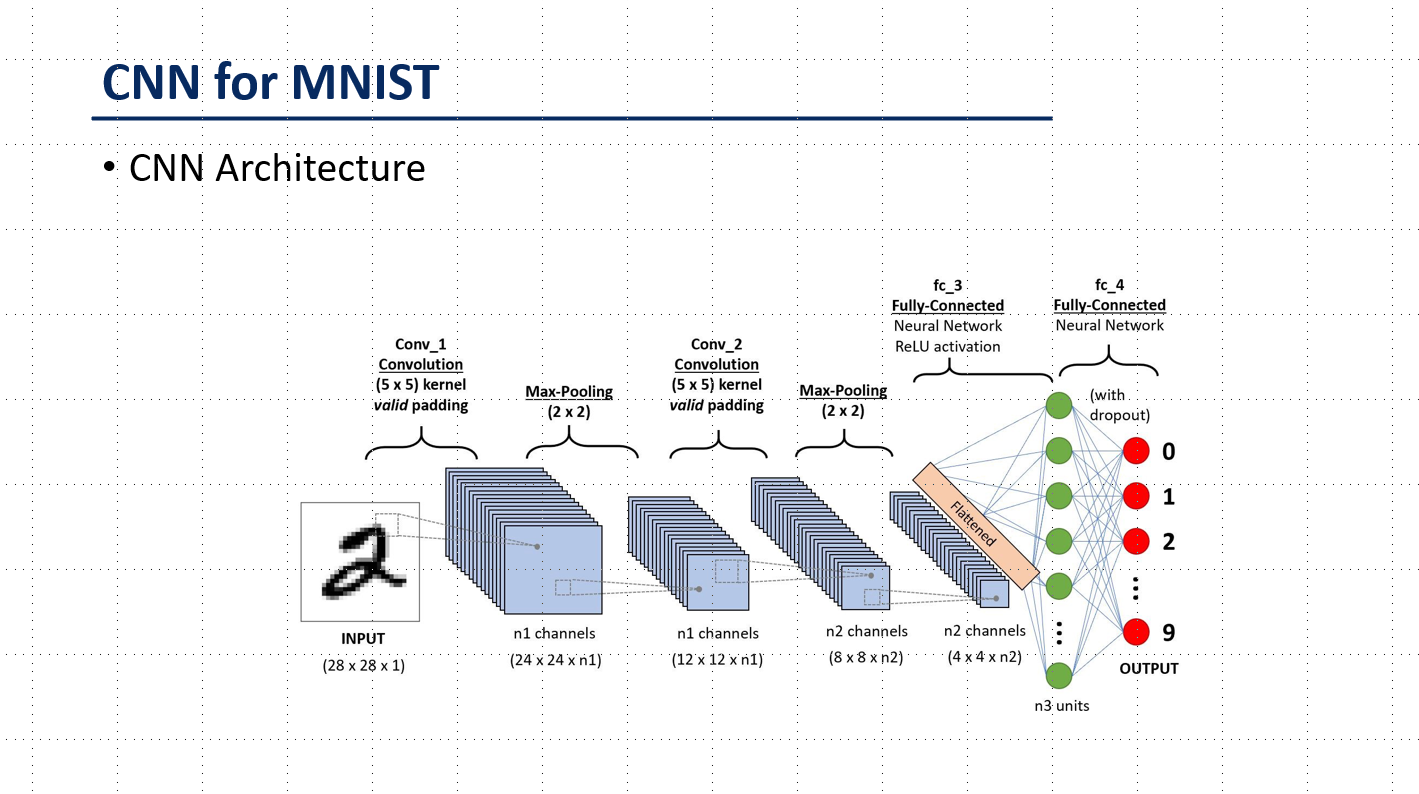


Valid padding: A state where no padding is applied.

In [ ]:
# Model Implementation
class Custom_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        ########################################## Complete This Code~!
        # Conv
        self.conv1 = nn.Conv2d(in_channels=?, out_channels=??, kernel_size=?, padding=0)
        self.conv2 = nn.Conv2d(in_channels=??, out_channels=??, kernel_size=?, padding=0)

        # FC
        self.fc3 = nn.Linear(??, ??)
        self.fc4 = nn.Linear(??, ??)

        # max pooling, activation, Dropout
        self.maxpool = nn.MaxPool2d(?)
        self.relu = nn.ReLU(inplace=True) # F.relu()
        self.dropout = nn.Dropout2d(p=0.2)

        ########################################## Complete This Code~!

    def forward(self, x): #(1, 28, 28)
        ########################################## Complete This Code~!

        # 1st Conv Layer


        # 2nd Conv Layer

        # flatten
        x = x.view(-1, ???) # reshape

        # 1nd fc layer


        # Dropout

        # 2nd fc layer

        ########################################## Complete This Code~!
        return x


model = Custom_CNN().to(DEVICE)
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
              ReLU-2           [-1, 10, 24, 24]               0
         MaxPool2d-3           [-1, 10, 12, 12]               0
            Conv2d-4             [-1, 20, 8, 8]           5,020
              ReLU-5             [-1, 20, 8, 8]               0
         MaxPool2d-6             [-1, 20, 4, 4]               0
            Linear-7                   [-1, 50]          16,050
              ReLU-8                   [-1, 50]               0
         Dropout2d-9                   [-1, 50]               0
           Linear-10                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 0.08
Estimated Tot

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
# Optimizer Setting
optimizer = optim.Adam(model.parameters(), lr=LR) # Adam

In [ ]:
# Train Implementation
def train_one_epoch(model, train_loader, optimizer, epoch):
    model.train() # Enables gradient computation
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
# Evaluation Implementation
def evaluate(model, test_loader):
    model.eval()  # Disables gradient computation
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

             # Sum the batch loss
            test_loss += F.cross_entropy(output, target, reduction='sum').item() # softmax is applied internally

            # The index with the highest value is the predicted label
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
# Train 및 Evaluate
for epoch in range(1, EPOCHS + 1):
    train_one_epoch(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302768
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.770014
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.785396
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.574259
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.522824
[1] Test Loss: 0.3331, Accuracy: 90.59%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.289176
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.369639
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.322468
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.232351
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.172974
[2] Test Loss: 0.2028, Accuracy: 93.95%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.267699
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.205729
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.229819
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.132805
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.261901
[3] Test Loss: 0.1500, Accuracy: 95.51%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.287394
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.281734
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.204002


In [ ]:
# Print Classes of the Dataset
CLASSES = dict()
for i in range(10) :
    CLASSES[i] = train_dataset.classes[i]
print(CLASSES)

{0: '0 - zero', 1: '1 - one', 2: '2 - two', 3: '3 - three', 4: '4 - four', 5: '5 - five', 6: '6 - six', 7: '7 - seven', 8: '8 - eight', 9: '9 - nine'}


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


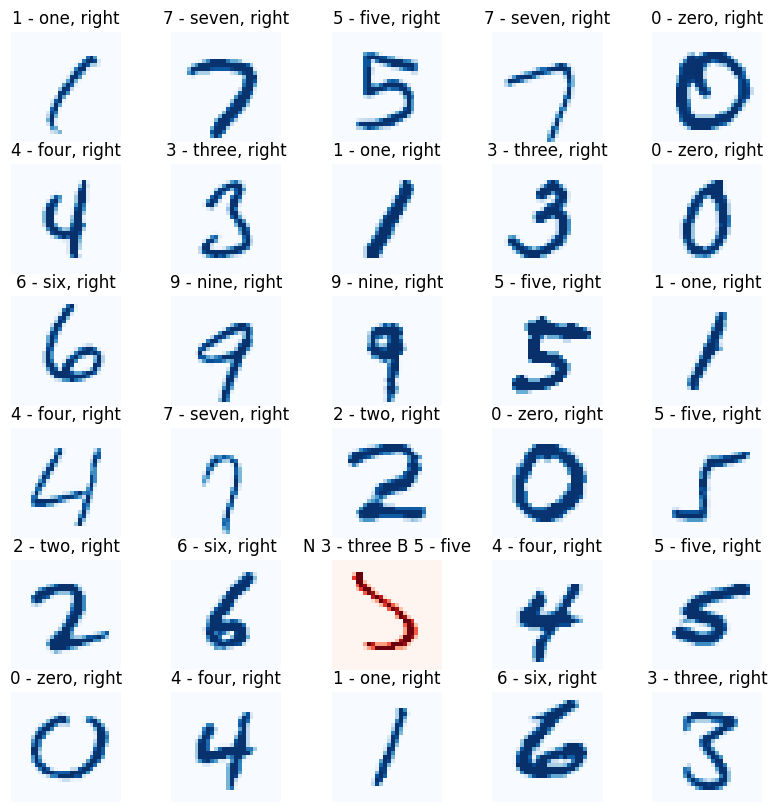

In [ ]:
# Visualization
columns = 6
rows = 5
fig = plt.figure(figsize=(10,10))  # Create a figure with width and height of 10 inches (set canvas size)
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataset))
    input_img = test_dataset[data_idx][0].unsqueeze(dim=0).to(DEVICE)  # When feeding input to the model, it must be in 4-D format
    output = model(input_img)  # Inference result from the model
    _, argmax = torch.max(output, dim=1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[test_dataset[data_idx][1]]

    fig.add_subplot(columns, rows, i)  # Divide the canvas into 'columns' columns and 'rows' rows, and use the i-th slot
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = test_dataset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)  # Display the image (cmap: colormap used to represent values)
    plt.axis('off')  # Hide axes and surrounding box to make the image look cleaner
plt.show()